In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import os

In [ ]:
df=pd.read_csv(r'power.csv', sep=';', header=0, low_memory=False, dayfirst='True', parse_dates={'datetime':[0,1]}, index_col=['datetime'])
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [ ]:
df = df.replace('?', np.nan)
df.isnull().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [ ]:
df.index = pd.to_datetime(df.index)

In [ ]:
def fill_missing(values):
    one_day = 60*24
    for row in range(df.shape[0]):
        for col in range(df.shape[1]):
            if np.isnan(values[row][col]):
                values[row,col] = values[row-one_day,col]
df = df.astype('float32')
fill_missing(df.values)
df.isnull().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [ ]:
weekly_df = df.resample('W').sum()
weekly_df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-17,4599.636230,260.928009,4.392778e+05,19579.400391,2033.0,4733.0,18267.0
2006-12-24,17477.128906,1176.173950,2.432524e+06,73992.398438,11190.0,21351.0,77447.0
2006-12-31,19736.517578,1452.333984,2.437971e+06,83023.000000,14237.0,22628.0,67237.0
2007-01-07,14961.068359,1348.953979,2.428490e+06,63122.199219,5857.0,17599.0,54193.0
2007-01-14,16176.333984,1590.284058,2.421684e+06,68851.000000,13420.0,18989.0,83356.0


In [ ]:
len(weekly_df)

207

In [ ]:
train_df,test_df = weekly_df[1:155], weekly_df[155:]

In [ ]:
train = train_df
scalers={}
for i in train_df.columns:
    scaler = MinMaxScaler(feature_range=(-1,1))
    s_s = scaler.fit_transform(train[i].values.reshape(-1,1))
    s_s=np.reshape(s_s,len(s_s))
    scalers['scaler_'+ i] = scaler
    train[i]=s_s
test = test_df
for i in train_df.columns:
    scaler = scalers['scaler_'+i]
    s_s = scaler.transform(test[i].values.reshape(-1,1))
    s_s=np.reshape(s_s,len(s_s))
    scalers['scaler_'+i] = scaler
    test[i]=s_s

<ipython-input-10-468d57fa9ccd>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[i]=s_s
<ipython-input-10-468d57fa9ccd>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[i]=s_s
<ipython-input-10-468d57fa9ccd>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

In [ ]:
train_df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-24,0.747298,-0.292388,0.901483,0.756904,-0.045018,0.361292,0.498416
2006-12-31,1.000000,0.105093,0.915632,1.000000,0.215020,0.444257,0.267336
2007-01-07,0.465888,-0.043703,0.891003,0.464288,-0.500149,0.117529,-0.027883
2007-01-14,0.601810,0.303646,0.873323,0.618502,0.145296,0.207835,0.632152
2007-01-21,0.640881,-0.003477,0.878395,0.655936,1.000000,0.278391,0.590417


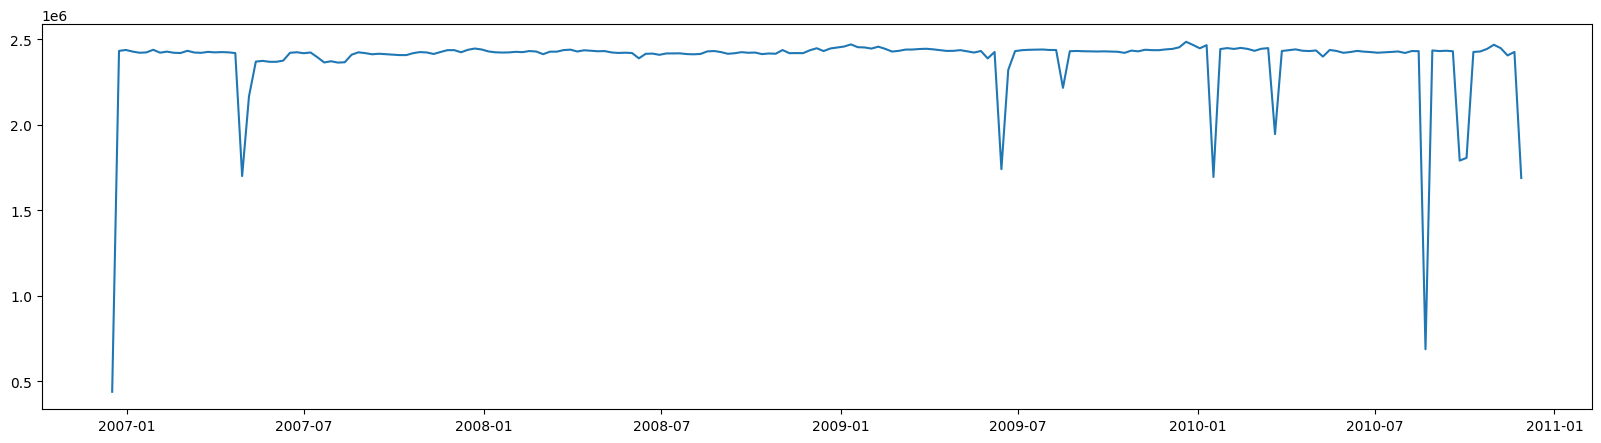

In [ ]:
plt.figure(figsize=(20, 5))
plt.plot(weekly_df.index, weekly_df.Voltage)
plt.show()

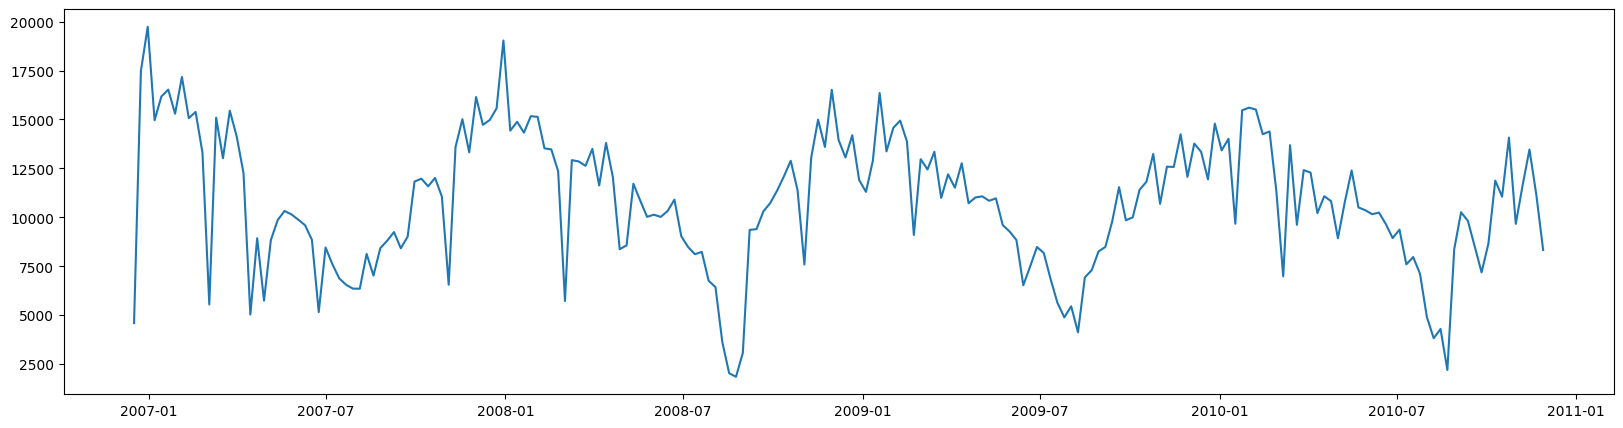

In [ ]:
plt.figure(figsize=(20, 5))
plt.plot(weekly_df.index, weekly_df.Global_active_power)
plt.show()

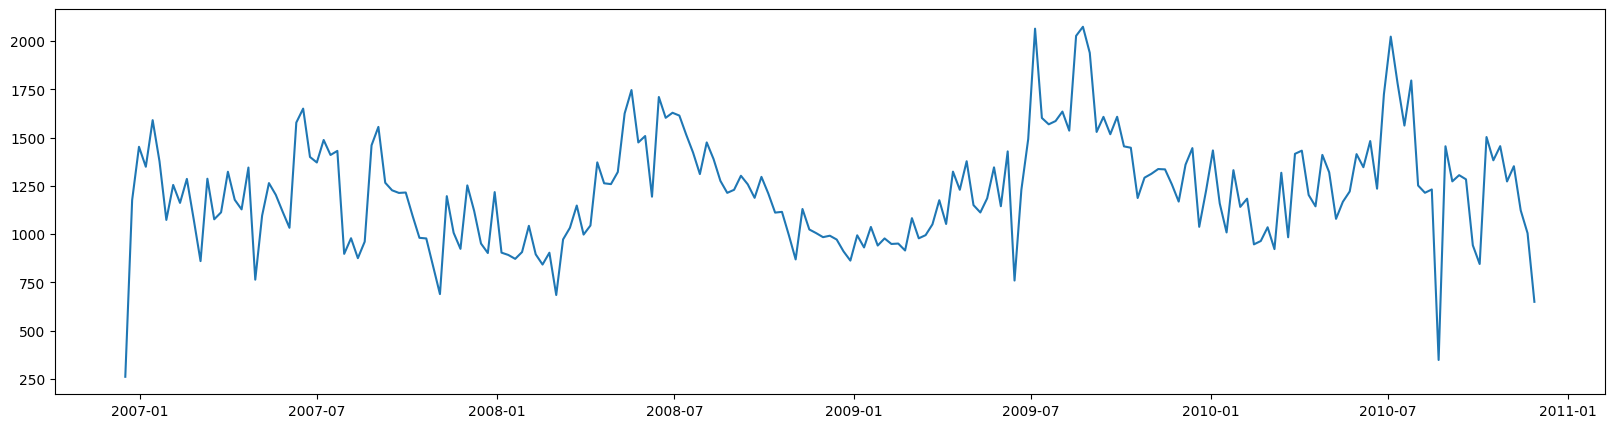

In [ ]:
plt.figure(figsize=(20, 5))
plt.plot(weekly_df.index, weekly_df.Global_reactive_power)
plt.show()

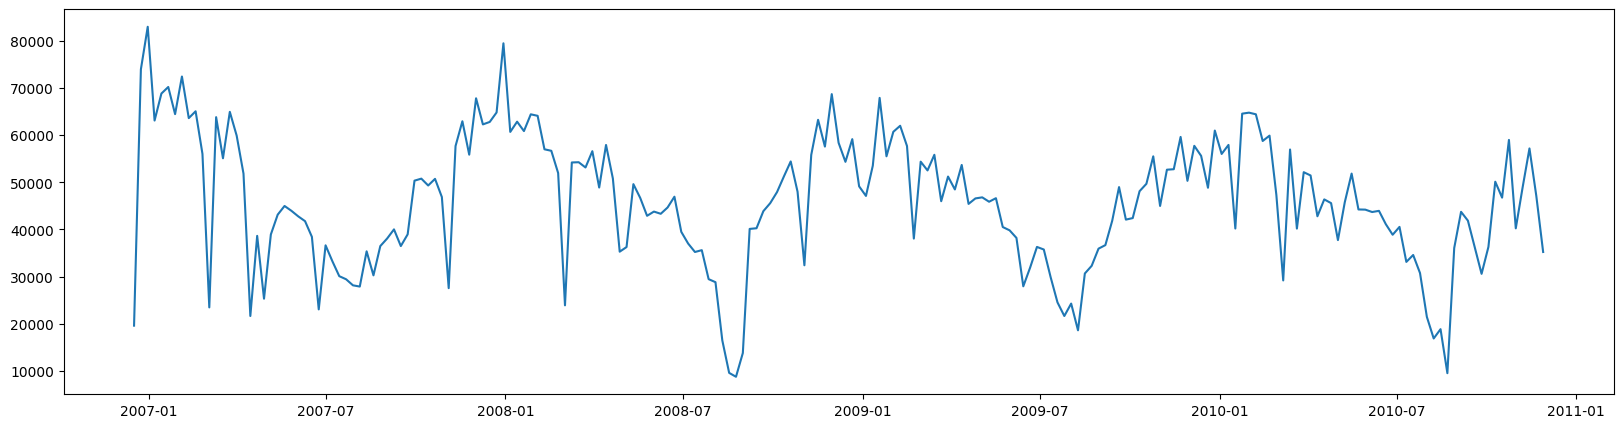

In [ ]:
plt.figure(figsize=(20, 5))
plt.plot(weekly_df.index, weekly_df.Global_intensity)
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller
adfuller(weekly_df['Global_active_power'])

(-4.302691659309852,
 0.0004394688719736688,
 1,
 205,
 {'1%': -3.4626576734812318,
  '5%': -2.8757444215841326,
  '10%': -2.5743412314098753},
 3461.0701023796455)

In [ ]:
from statsmodels.tsa.stattools import kpss
kpss(weekly_df['Global_active_power'])

<ipython-input-17-0d5b8ba3d3cb>:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss(weekly_df['Global_active_power'])


(0.11289548768496763,
 0.1,
 8,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [ ]:
from statsmodels.tsa.stattools import adfuller
adfuller(weekly_df['Global_reactive_power'])

(-5.076850545533774,
 1.560205116833094e-05,
 1,
 205,
 {'1%': -3.4626576734812318,
  '5%': -2.8757444215841326,
  '10%': -2.5743412314098753},
 2592.4385826392217)

In [ ]:
from statsmodels.tsa.stattools import kpss
kpss(weekly_df['Global_reactive_power'])

<ipython-input-19-e27492a41ae7>:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss(weekly_df['Global_reactive_power'])


(0.2449346459999922,
 0.1,
 8,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [ ]:
from statsmodels.tsa.stattools import kpss
kpss(weekly_df['Global_intensity'])

<ipython-input-20-6665abb88152>:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss(weekly_df['Global_intensity'])


(0.133856499745938,
 0.1,
 8,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [ ]:
from statsmodels.tsa.stattools import adfuller
adfuller(weekly_df['Global_intensity'])

(-4.440899164170115,
 0.00025108284366358866,
 1,
 205,
 {'1%': -3.4626576734812318,
  '5%': -2.8757444215841326,
  '10%': -2.5743412314098753},
 4008.083950431497)

In [ ]:
from scipy import signal
def ccf_values(series1, series2):
    p = series1
    q = series2
    p = (p - np.mean(p)) / (np.std(p) * len(p))
    q = (q - np.mean(q)) / (np.std(q))
    c = np.correlate(p, q, 'full')
    return c

ccf = ccf_values(weekly_df['Global_active_power'], weekly_df['Global_intensity'])
ccf

array([ 6.88681193e-03, -8.25256482e-03, -1.63853802e-02,  2.53735390e-03,
        1.10494737e-02, -1.02117676e-02,  6.94284029e-03,  9.86860879e-03,
        1.60354991e-02,  1.63243152e-02, -6.28279638e-04, -4.01310250e-03,
       -1.40058110e-02, -1.86653230e-02,  8.69386655e-04, -2.94258054e-02,
       -6.29881695e-02, -5.43782189e-02, -8.74442235e-02, -8.09886605e-02,
       -7.88954049e-02, -9.86175835e-02, -1.11087017e-01, -1.04549967e-01,
       -9.98778790e-02, -5.49683459e-02, -5.00155203e-02, -3.30811180e-02,
       -4.77181710e-02, -4.88735400e-02, -2.94819418e-02, -1.35965655e-02,
       -1.50248520e-02,  2.43812390e-02,  1.45986751e-02,  2.49806251e-02,
        4.21869829e-02,  2.17973161e-02,  4.13398556e-02,  2.99281664e-02,
        2.36110222e-02,  6.30049482e-02,  6.45900518e-02,  8.18263441e-02,
        1.03973024e-01,  1.13102749e-01,  1.17230296e-01,  1.25013202e-01,
        1.13080531e-01,  1.65564075e-01,  1.24973424e-01,  9.40757692e-02,
        1.01543725e-01,  

In [ ]:
lags = signal.correlation_lags(len(weekly_df['Global_active_power']), len(weekly_df['Global_intensity']))

def ccf_plot(lags, ccf, lag_limit, title):
    fig, ax =plt.subplots(figsize=(9, 6))
    ax.plot(lags, ccf)
    ax.axhline(-2/np.sqrt(23), color='red', label='5% confidence interval')
    ax.axhline(2/np.sqrt(23), color='red')
    ax.axvline(x = 0, color = 'black', lw = 1)
    ax.axhline(y = 0, color = 'black', lw = 1)
    ax.axhline(y = np.max(ccf), color = 'blue', lw = 1,
    linestyle='--', label = 'highest +/- correlation')
    ax.axhline(y = np.min(ccf), color = 'blue', lw = 1,
    linestyle='--')
    ax.set(ylim = [-1, 1])
    ax.set(xlim = lag_limit)
    ax.set_title(title, weight='bold', fontsize = 15)
    ax.set_ylabel('Correlation Coefficients', weight='bold',
    fontsize = 12)
    ax.set_xlabel('Time Lags', weight='bold', fontsize = 12)
    plt.legend()


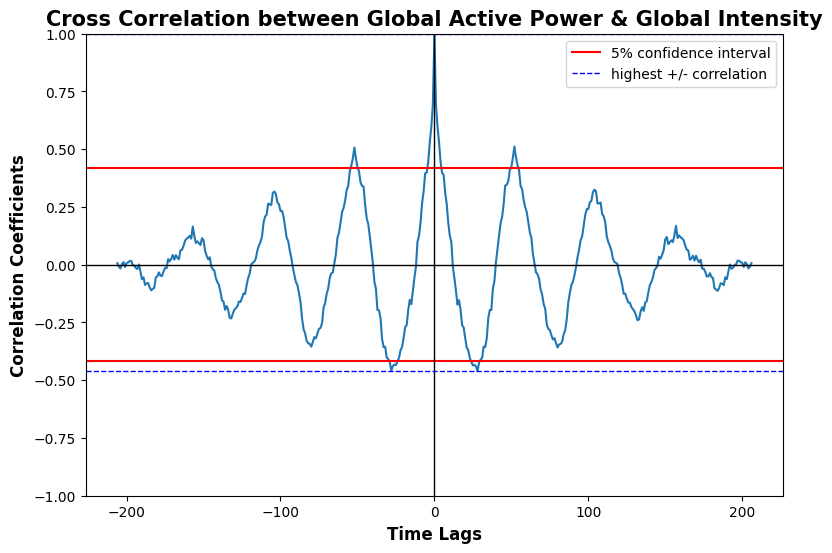

In [ ]:
ccf_plot(lags, ccf, None, 'Cross Correlation between Global Active Power & Global Intensity')

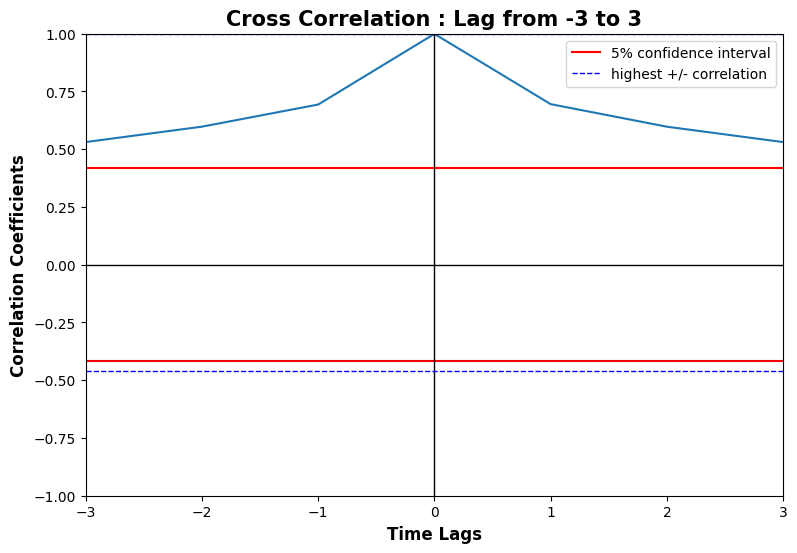

In [ ]:
ccf_plot(lags, ccf, [-3,3],'Cross Correlation : Lag from -3 to 3')

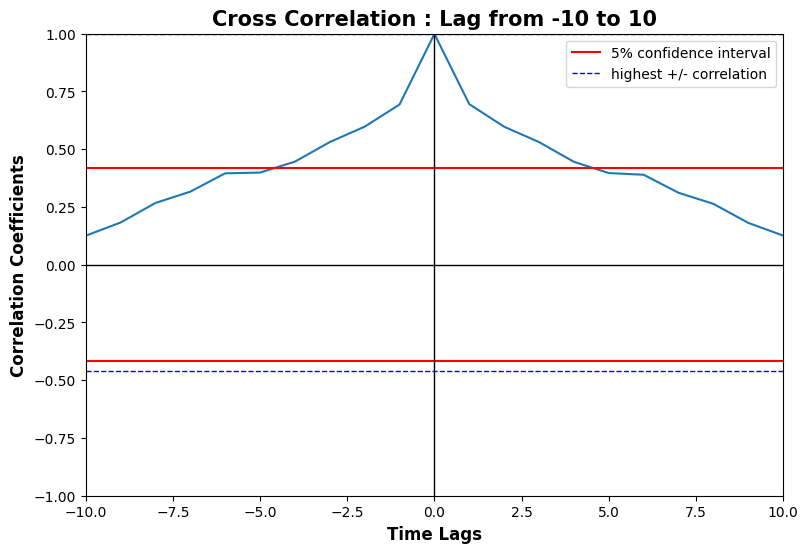

In [ ]:
ccf_plot(lags, ccf, [-10,10], 'Cross Correlation : Lag from -10 to 10')

In [ ]:
ccf_volt = ccf_values(weekly_df['Global_active_power'], weekly_df['Voltage'])
ccf_volt

array([ 2.84126494e-02, -3.22563313e-02, -3.99060920e-02, -1.82016529e-02,
       -2.27748062e-02, -1.90792102e-02, -1.06899887e-02, -1.87365897e-02,
        1.80058945e-02, -9.10164509e-03, -6.13113344e-02, -1.49729997e-02,
       -4.47060801e-02, -3.98664847e-02,  2.18894277e-02, -1.21649466e-01,
       -1.36266708e-01, -3.88248600e-02, -6.50537610e-02, -1.41390879e-02,
       -2.39127427e-02, -8.39362815e-02, -6.46779016e-02, -7.27952272e-02,
       -3.44971605e-02,  9.45579559e-02,  2.74431147e-03,  3.86334658e-02,
       -4.99881664e-03, -2.03051628e-03,  1.17885070e-02,  9.32600498e-02,
        5.16777486e-02,  8.87210816e-02,  4.88437228e-02,  5.99280149e-02,
        6.89037517e-02,  1.72194559e-02,  1.75221562e-02,  4.53620106e-02,
        5.00522815e-02,  7.67745003e-02,  3.73881683e-02,  3.92661206e-02,
        5.25760576e-02,  8.47962499e-02,  4.86673824e-02,  3.17701101e-02,
        2.41932823e-04,  6.07301435e-03, -4.08454314e-02, -2.39670407e-02,
       -3.24993879e-02,  

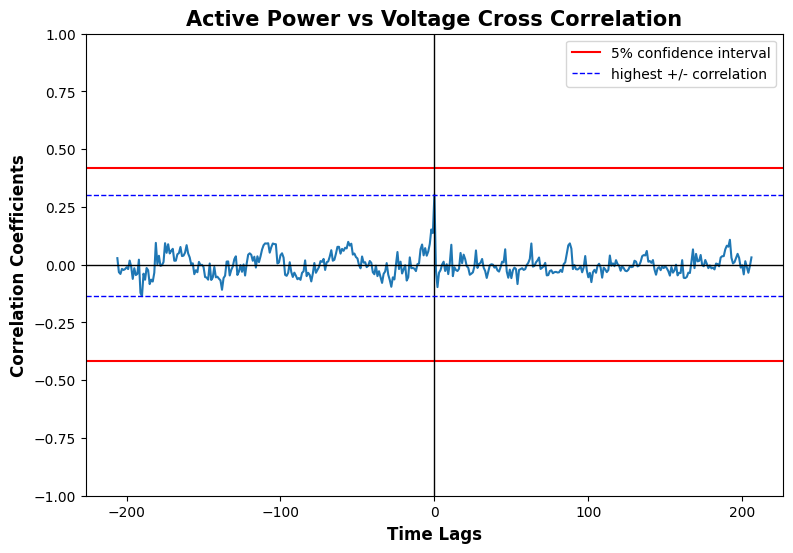

In [ ]:
lags_v = signal.correlation_lags(len(weekly_df['Global_active_power']), len(weekly_df['Voltage']))
ccf_plot(lags_v, ccf_volt, None, 'Active Power vs Voltage Cross Correlation')

In [ ]:
endogenous_variables = ['Voltage', 'Global_reactive_power', 'Global_active_power', 'Global_intensity']

exogenous_variables = ['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

all_variables = endogenous_variables + exogenous_variables

correlation_matrix = df[all_variables].corr()

print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                        Voltage  Global_reactive_power  Global_active_power  \
Voltage                1.000000              -0.112246            -0.399762   
Global_reactive_power -0.112246               1.000000             0.247017   
Global_active_power   -0.399762               0.247017             1.000000   
Global_intensity      -0.411363               0.266120             0.998889   
Sub_metering_1        -0.195976               0.123111             0.484401   
Sub_metering_2        -0.167405               0.139231             0.434569   
Sub_metering_3        -0.268172               0.089617             0.638555   

                       Global_intensity  Sub_metering_1  Sub_metering_2  \
Voltage                       -0.411363       -0.195976       -0.167405   
Global_reactive_power          0.266120        0.123111        0.139231   
Global_active_power            0.998889        0.484401        0.434569   
Global_intensity               1.000000        

Global active power and intensity are highly correlated (0.99).

The sub-metering variables show moderate positive correlations with global active power and intensity.

In [ ]:
weekly_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 207 entries, 2006-12-17 to 2010-11-28
Freq: W-SUN
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Global_active_power    207 non-null    float32
 1   Global_reactive_power  207 non-null    float32
 2   Voltage                207 non-null    float32
 3   Global_intensity       207 non-null    float32
 4   Sub_metering_1         207 non-null    float32
 5   Sub_metering_2         207 non-null    float32
 6   Sub_metering_3         207 non-null    float32
dtypes: float32(7)
memory usage: 7.3 KB


In [ ]:
import pandas as pd
from statsmodels.tsa.statespace.varmax import VARMAX

endogenous_variables = ['Global_intensity', 'Global_active_power']
exogenous_variables = ['Sub_metering_3']

model = VARMAX(endog = train_df[endogenous_variables], exog=train_df[exogenous_variables])

In [ ]:
from statsmodels.tsa.vector_ar.var_model import VAR
model = VAR(train_df[endogenous_variables])

In [ ]:
optimal_model = model.select_order(maxlags = 15)
print(optimal_model.summary())

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0       -10.73      -10.69   2.180e-05      -10.72
1      -12.64*     -12.51*  3.251e-06*     -12.58*
2       -12.62      -12.41   3.308e-06      -12.53
3       -12.58      -12.28   3.454e-06      -12.46
4       -12.55      -12.17   3.559e-06      -12.39
5       -12.51      -12.05   3.674e-06      -12.33
6       -12.49      -11.94   3.777e-06      -12.26
7       -12.48      -11.84   3.826e-06      -12.22
8       -12.45      -11.73   3.947e-06      -12.15
9       -12.42      -11.62   4.044e-06      -12.10
10      -12.41      -11.53   4.087e-06      -12.05
11      -12.38      -11.41   4.229e-06      -11.99
12      -12.34      -11.28   4.409e-06      -11.91
13      -12.33      -11.19   4.460e-06      -11.87
14      -12.34      -11.11   4.442e-06      -11.84
15      -12.32      -11.01   4.534e-06      -11.79
-------------------------------

In [ ]:
model_varmax_1 = VARMAX(endog = train_df[endogenous_variables], exog=train_df[exogenous_variables], order=(1, 0)).fit()

In [ ]:
model_varmax_5 = VARMAX(endog = train_df[endogenous_variables], exog=train_df[exogenous_variables], order=(5, 0)).fit()

In [ ]:
model_varmax_1.mse

0.0742409350649629

In [ ]:
model_varmax_5.mse

0.06495722103121966

In [ ]:
forecast_varmax1 = model_varmax_1.forecast(52, exog=test_df[exogenous_variables])
forecast_varmax5 = model_varmax_5.forecast(52, exog=test_df[exogenous_variables])

In [ ]:
forecast_varmax1.head(3)

,Global_intensity,Global_active_power
2009-12-06,0.217729,0.235207
2009-12-13,0.298273,0.312519
2009-12-20,0.335865,0.348458


Text(0.5, 1.0, 'VARMAX Predictions for Global Active Power: Y1')

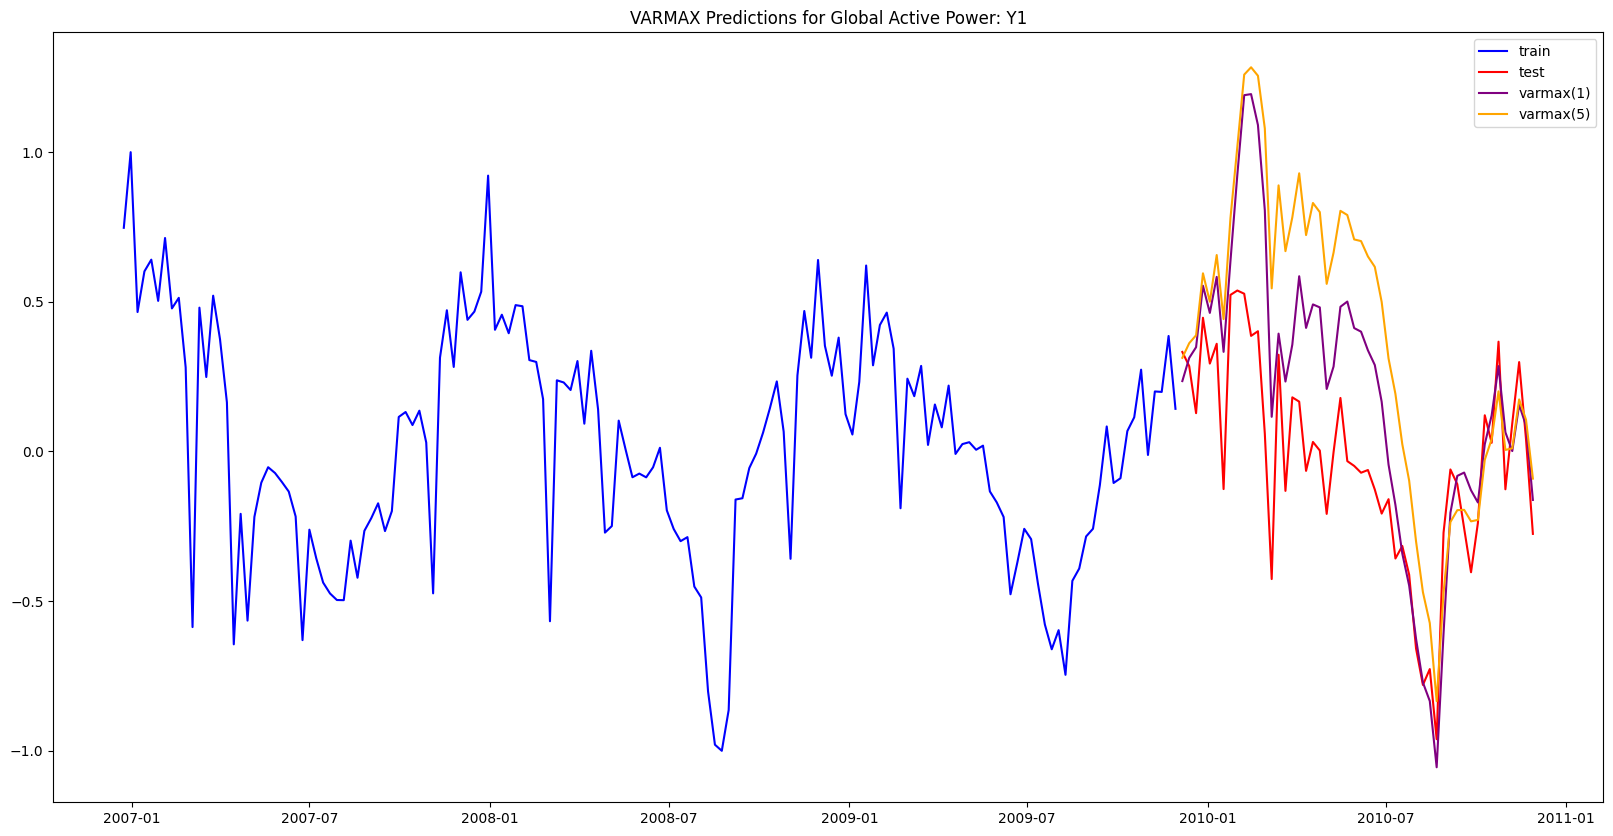

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(train_df.index, train_df['Global_active_power'], color='blue')
plt.plot(test_df.index, test_df['Global_active_power'], color='red')
plt.plot(forecast_varmax1.index, forecast_varmax1['Global_active_power'], color='purple')
plt.plot(forecast_varmax5.index, forecast_varmax5['Global_active_power'], color='orange')
plt.legend(['train', 'test', 'varmax(1)', 'varmax(5)'])
plt.title('VARMAX Predictions for Global Active Power: Y1')

Text(0.5, 1.0, 'VARMAX Predictions for Global Intensity: Y2')

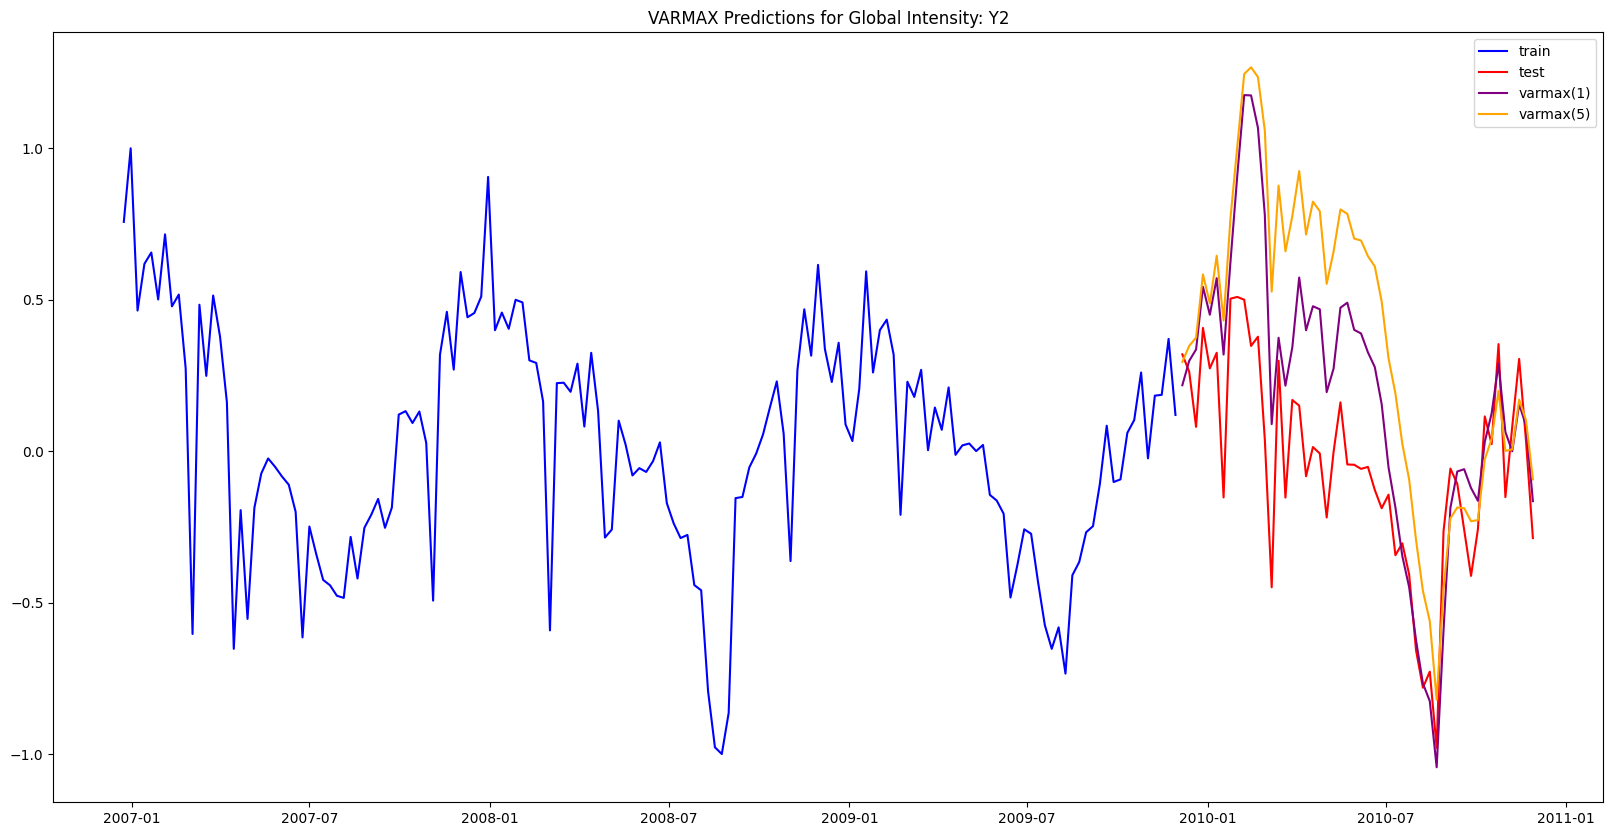

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(train_df.index, train_df['Global_intensity'], color='blue')
plt.plot(test_df.index, test_df['Global_intensity'], color='red')
plt.plot(forecast_varmax1.index, forecast_varmax1['Global_intensity'], color='purple')
plt.plot(forecast_varmax5.index, forecast_varmax5['Global_intensity'], color='orange')
plt.legend(['train', 'test', 'varmax(1)', 'varmax(5)'])
plt.title('VARMAX Predictions for Global Intensity: Y2')

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

rmse = np.sqrt(mean_squared_error(test_df['Global_active_power'], forecast_varmax1['Global_active_power'])).round(2)
mape = np.round(mean_absolute_percentage_error(test_df['Global_active_power'], forecast_varmax1['Global_active_power']),2)
results = pd.DataFrame({'Method':['VARMAX 1 (by AIC): Global Active Power'], 'RMSE': [rmse], 'MAPE': [mape]})
results = results[['Method', 'RMSE', 'MAPE']]

In [ ]:
rmse = np.sqrt(mean_squared_error(test_df['Global_active_power'], forecast_varmax5['Global_active_power'])).round(2)
mape = np.round(mean_absolute_percentage_error(test_df['Global_active_power'], forecast_varmax5['Global_active_power']),2)
temp = pd.DataFrame({'Method':['VARMAX 5 (by lag cutoff): Global Active Power'], 'RMSE': [rmse], 'MAPE': [mape]})
results = pd.concat([results, temp])
results = results[['Method', 'RMSE', 'MAPE']]

In [ ]:
rmse = np.sqrt(mean_squared_error(test_df['Global_intensity'], forecast_varmax1['Global_intensity'])).round(2)
mape = np.round(mean_absolute_percentage_error(test_df['Global_intensity'], forecast_varmax1['Global_intensity']),2)
temp = pd.DataFrame({'Method':['VARMAX 1 (by AIC): Global Intensity'], 'RMSE': [rmse], 'MAPE': [mape]})
results = pd.concat([results, temp])
results = results[['Method', 'RMSE', 'MAPE']]

In [ ]:
rmse = np.sqrt(mean_squared_error(test_df['Global_intensity'], forecast_varmax5['Global_intensity'])).round(2)
mape = np.round(mean_absolute_percentage_error(test_df['Global_intensity'], forecast_varmax5['Global_intensity']),2)
temp = pd.DataFrame({'Method':['VARMAX 5 (by lag cut-off): Global Intensity'], 'RMSE': [rmse], 'MAPE': [mape]})
results = pd.concat([results, temp])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,VARMAX 1 (by AIC): Global Active Power,0.34,7.72
0,VARMAX 5 (by lag cutoff): Global Active Power,0.53,14.39
0,VARMAX 1 (by AIC): Global Intensity,0.34,5.95
0,VARMAX 5 (by lag cut-off): Global Intensity,0.54,11.18
